<a href="https://colab.research.google.com/github/imprincesarraf/imprincesarraf/blob/main/Aqi%20new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [331]:
import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/chennai data.xlsx")
df.head()
     

,From Date,To Date,PM2.5,PM10,NO2,NH3,SO2,CO,O3
0,23-01-2016 00:00,23-01-2016 00:00,101.12,0,20.67,0,2.71,0.82037,25.23
1,24-01-2016 00:00,24-01-2016 00:00,97.32,0,18.3,0,2.83,0.60096,34.43
2,25-01-2016 00:00,25-01-2016 00:00,87.45,0,12.48,0,2.61,0.48416,66.41
3,26-01-2016 00:00,26-01-2016 00:00,71.88,0,15.49,0,2.84,0,30.81
4,27-01-2016 00:00,27-01-2016 00:00,88.96,0,14.59,0,2.35,0.83832,26.15


In [332]:

df.shape
     

(2560, 9)

In [333]:

df.info()
     


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  2560 non-null   object
 1   To Date    2560 non-null   object
 2   PM2.5      2557 non-null   object
 3   PM10       2560 non-null   object
 4   NO2        2560 non-null   object
 5   NH3        2560 non-null   object
 6   SO2        2560 non-null   object
 7   CO         2520 non-null   object
 8   O3         2560 non-null   object
dtypes: object(9)
memory usage: 180.1+ KB


In [334]:
df.describe()

,From Date,To Date,PM2.5,PM10,NO2,NH3,SO2,CO,O3
count,2560,2560,2557,2560,2560,2560,2560,2520.0,2560
unique,2559,2559,2033,631,1666,487,1312,817.0,1134
top,22-01-2018 00:00,23-01-2018 00:00,None,0,None,0,None,0.7,0
freq,2,2,209,1462,193,1462,201,269.0,1098


In [335]:

df.isnull().sum()
# There are a lot of missing values present in the dataset

From Date     0
To Date       0
PM2.5         3
PM10          0
NO2           0
NH3           0
SO2           0
CO           40
O3            0
dtype: int64

In [336]:
df.nunique()

From Date    2559
To Date      2559
PM2.5        2033
PM10          631
NO2          1666
NH3           487
SO2          1312
CO            817
O3           1134
dtype: int64

In [337]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
nullvalues

CO           40
PM2.5         3
From Date     0
To Date       0
PM10          0
NO2           0
NH3           0
SO2           0
O3            0
dtype: int64

In [338]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)


In [339]:

missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
     

In [340]:
missing_data_with_percentage

,Total,Percent
CO,40,1.562500
PM2.5,3,0.117188
From Date,0,0.000000
To Date,0,0.000000
PM10,0,0.000000
NO2,0,0.000000
NH3,0,0.000000
SO2,0,0.000000
O3,0,0.000000


In [341]:

df = df.rename(columns={'From Date': 'Date'})
df.drop(['To Date'],axis=1,inplace=True)
df.head()
     

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,O3
0,23-01-2016 00:00,101.12,0,20.67,0,2.71,0.82037,25.23
1,24-01-2016 00:00,97.32,0,18.3,0,2.83,0.60096,34.43
2,25-01-2016 00:00,87.45,0,12.48,0,2.61,0.48416,66.41
3,26-01-2016 00:00,71.88,0,15.49,0,2.84,0,30.81
4,27-01-2016 00:00,88.96,0,14.59,0,2.35,0.83832,26.15


In [342]:

df.Date=df.Date.str[0:10]
df.head()


,Date,PM2.5,PM10,NO2,NH3,SO2,CO,O3
0,23-01-2016,101.12,0,20.67,0,2.71,0.82037,25.23
1,24-01-2016,97.32,0,18.3,0,2.83,0.60096,34.43
2,25-01-2016,87.45,0,12.48,0,2.61,0.48416,66.41
3,26-01-2016,71.88,0,15.49,0,2.84,0,30.81
4,27-01-2016,88.96,0,14.59,0,2.35,0.83832,26.15


In [343]:

df.dtypes['Date']

dtype('O')

In [344]:

df['Date'][1]

'24-01-2016'

In [345]:
df.dtypes

Date     object
PM2.5    object
PM10     object
NO2      object
NH3      object
SO2      object
CO       object
O3       object
dtype: object

In [346]:

df['Date']

0       23-01-2016
1       24-01-2016
2       25-01-2016
3       26-01-2016
4       27-01-2016
           ...    
2555    19-01-2023
2556    20-01-2023
2557    21-01-2023
2558    22-01-2023
2559    23-01-2023
Name: Date, Length: 2560, dtype: object

In [347]:

df['Date'] = pd.to_datetime(df['Date'],errors='coerce') 

<ipython-input-347-2df01ec6b058>:1: UserWarning: Parsing '23-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
<ipython-input-347-2df01ec6b058>:1: UserWarning: Parsing '24-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
<ipython-input-347-2df01ec6b058>:1: UserWarning: Parsing '25-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
<ipython-input-347-2df01ec6b058>:1: UserWarning: Parsing '26-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
<ipython-input-347-2df01ec6b058>:1: UserWarning: Parsing '27-01-2016' in DD/MM/YYYY format. 

In [348]:
df['Date']

0      2016-01-23
1      2016-01-24
2      2016-01-25
3      2016-01-26
4      2016-01-27
          ...    
2555   2023-01-19
2556   2023-01-20
2557   2023-01-21
2558   2023-01-22
2559   2023-01-23
Name: Date, Length: 2560, dtype: datetime64[ns]

In [349]:
df.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,O3
0,2016-01-23,101.12,0,20.67,0,2.71,0.82037,25.23
1,2016-01-24,97.32,0,18.3,0,2.83,0.60096,34.43
2,2016-01-25,87.45,0,12.48,0,2.61,0.48416,66.41
3,2016-01-26,71.88,0,15.49,0,2.84,0,30.81
4,2016-01-27,88.96,0,14.59,0,2.35,0.83832,26.15


In [350]:
df['PM2.5'] = pd.to_numeric(df['PM2.5'], downcast='integer', errors='coerce')
df['PM10'] = pd.to_numeric(df['PM10'], downcast='integer', errors='coerce')
df['NO2'] = pd.to_numeric(df['NO2'], downcast='integer', errors='coerce')
df['NH3'] = pd.to_numeric(df['NH3'], downcast='integer', errors='coerce')
df['SO2'] = pd.to_numeric(df['SO2'], downcast='integer', errors='coerce')
df['CO'] = pd.to_numeric(df['CO'], downcast='integer', errors='coerce')
df['O3'] = pd.to_numeric(df['O3'], downcast='integer', errors='coerce')
df.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,O3
0,2016-01-23,101.12,0.0,20.67,0.0,2.71,0.82037,25.23
1,2016-01-24,97.32,0.0,18.30,0.0,2.83,0.60096,34.43
2,2016-01-25,87.45,0.0,12.48,0.0,2.61,0.48416,66.41
3,2016-01-26,71.88,0.0,15.49,0.0,2.84,0.00000,30.81
4,2016-01-27,88.96,0.0,14.59,0.0,2.35,0.83832,26.15


In [351]:
df.dtypes
     

Date     datetime64[ns]
PM2.5           float64
PM10            float64
NO2             float64
NH3             float64
SO2             float64
CO              float64
O3              float64
dtype: object

In [352]:

df.isnull().sum()

Date       1
PM2.5    212
PM10     439
NO2      193
NH3      449
SO2      201
CO       295
O3       157
dtype: int64

In [353]:

df.isna().sum()
     

Date       1
PM2.5    212
PM10     439
NO2      193
NH3      449
SO2      201
CO       295
O3       157
dtype: int64

In [354]:
df['Date'].fillna(method='bfill', inplace=True)
df['PM2.5'] = df['PM2.5'].interpolate(method='linear')
df['PM10'] = df['PM10'].interpolate(method='linear')
df['NO2'] = df['PM2.5'].interpolate(method='linear')
df['NH3'] = df['NH3'].interpolate(method='linear')
df['SO2'] = df['SO2'].interpolate(method='linear')
df['CO'] = df['CO'].interpolate(method='linear')
df['O3'] = df['O3'].interpolate(method='linear')
#df['Date'] = df['Date'].interpolate(method='linear').round().astype(datetime64[ns])
     


In [355]:
df.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,O3
0,2016-01-23,101.12,0.0,101.12,0.0,2.71,0.82037,25.23
1,2016-01-24,97.32,0.0,97.32,0.0,2.83,0.60096,34.43
2,2016-01-25,87.45,0.0,87.45,0.0,2.61,0.48416,66.41
3,2016-01-26,71.88,0.0,71.88,0.0,2.84,0.00000,30.81
4,2016-01-27,88.96,0.0,88.96,0.0,2.35,0.83832,26.15


In [356]:
df.isna().sum()

Date     0
PM2.5    0
PM10     0
NO2      0
NH3      0
SO2      0
CO       0
O3       0
dtype: int64

In [357]:
df.isnull().sum()

Date     0
PM2.5    0
PM10     0
NO2      0
NH3      0
SO2      0
CO       0
O3       0
dtype: int64

In [358]:
#df.to_csv('cleaned_data.csv', index=False)

# download the CSV file
#from google.colab import files
#files.download('cleaned_data.csv')

In [359]:
df.corr()

,PM2.5,PM10,NO2,NH3,SO2,CO,O3
PM2.5,1.000000,-0.142998,1.000000,-0.139944,-0.051096,-0.045271,0.129274
PM10,-0.142998,1.000000,-0.142998,0.327179,0.094858,-0.008899,-0.335596
NO2,1.000000,-0.142998,1.000000,-0.139944,-0.051096,-0.045271,0.129274
NH3,-0.139944,0.327179,-0.139944,1.000000,0.424763,0.357528,-0.312512
SO2,-0.051096,0.094858,-0.051096,0.424763,1.000000,0.159955,-0.099088
CO,-0.045271,-0.008899,-0.045271,0.357528,0.159955,1.000000,-0.147001
O3,0.129274,-0.335596,0.129274,-0.312512,-0.099088,-0.147001,1.000000


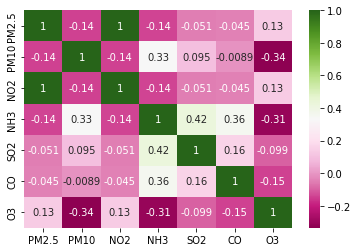

In [360]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
dataplot = sn.heatmap(df.corr(), cmap="PiYG", annot=True)
plt.show()

In [361]:
df.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,O3
0,2016-01-23,101.12,0.0,101.12,0.0,2.71,0.82037,25.23
1,2016-01-24,97.32,0.0,97.32,0.0,2.83,0.60096,34.43
2,2016-01-25,87.45,0.0,87.45,0.0,2.61,0.48416,66.41
3,2016-01-26,71.88,0.0,71.88,0.0,2.84,0.00000,30.81
4,2016-01-27,88.96,0.0,88.96,0.0,2.35,0.83832,26.15


In [362]:
import pandas as pd
df1=pd.read_excel("/content/drive/MyDrive/Final_FYP_AQI.xlsx")
df1.head()
     


,Date,PM2.5,Subindex (PM2.5),Check (PM2.5),PM10,Subindex (PM10),Check (PM10),NO2,Subindex (NO2),Check (NO2),...,SO2,Subindex (SO2),Check (SO2),CO,Subindex (CO),Check (CO),O3,Subindex (O3),Check (O3),AQI
0,2016-01-23,101.12,237.066667,1,0.0,0.0,0,101.12,121.12,1,...,2.71,3.3875,1,0.82037,41.0185,1,25.23,25.23,1,237.066667
1,2016-01-24,97.32,224.400000,1,0.0,0.0,0,97.32,117.32,1,...,2.83,3.5375,1,0.60096,30.0480,1,34.43,34.43,1,224.4
2,2016-01-25,87.45,191.500000,1,0.0,0.0,0,87.45,107.45,1,...,2.61,3.2625,1,0.48416,24.2080,1,66.41,66.41,1,191.5
3,2016-01-26,71.88,139.600000,1,0.0,0.0,0,71.88,89.85,1,...,2.84,3.5500,1,0.00000,0.0000,0,30.81,30.81,1,139.6
4,2016-01-27,88.96,196.533333,1,0.0,0.0,0,88.96,108.96,1,...,2.35,2.9375,1,0.83832,41.9160,1,26.15,26.15,1,196.533333


In [363]:
df1.columns

Index(['Date', 'PM2.5', 'Subindex (PM2.5)', 'Check (PM2.5)', 'PM10',
       'Subindex (PM10)', 'Check (PM10)', 'NO2', 'Subindex (NO2)',
       'Check (NO2)', 'NH3', 'Subindex (NH3)', 'Check (NH3)', 'SO2',
       'Subindex (SO2)', 'Check (SO2)', 'CO', 'Subindex (CO)', 'Check (CO)',
       'O3', 'Subindex (O3)', 'Check (O3)', 'AQI'],
      dtype='object')

In [364]:

df1['AQI'] = pd.to_numeric(df1['AQI'], downcast='integer', errors='coerce')

In [365]:
df1.dtypes

Date                datetime64[ns]
PM2.5                      float64
Subindex (PM2.5)           float64
Check (PM2.5)                int64
PM10                       float64
Subindex (PM10)            float64
Check (PM10)                 int64
NO2                        float64
Subindex (NO2)             float64
Check (NO2)                  int64
NH3                        float64
Subindex (NH3)             float64
Check (NH3)                  int64
SO2                        float64
Subindex (SO2)             float64
Check (SO2)                  int64
CO                         float64
Subindex (CO)              float64
Check (CO)                   int64
O3                         float64
Subindex (O3)              float64
Check (O3)                   int64
AQI                        float64
dtype: object

In [366]:
df1.isnull().sum()

Date                0
PM2.5               0
Subindex (PM2.5)    0
Check (PM2.5)       0
PM10                0
Subindex (PM10)     0
Check (PM10)        0
NO2                 0
Subindex (NO2)      0
Check (NO2)         0
NH3                 0
Subindex (NH3)      0
Check (NH3)         0
SO2                 0
Subindex (SO2)      0
Check (SO2)         0
CO                  0
Subindex (CO)       0
Check (CO)          0
O3                  0
Subindex (O3)       0
Check (O3)          0
AQI                 7
dtype: int64

In [367]:
df1['O3'] = df1['O3'].interpolate(method='linear')
df1['AQI'] = df1['AQI'].interpolate(method='linear')

In [368]:
#from sklearn.linear_model import LinearRegression

# create sample data
X =df1[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']]
y =df1['AQI']




In [369]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Create a Linear Regression model object
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)


# make predictions on the training data
y_train_pred = lr.predict(X_train)

# calculate R-squared and MSE for training data
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# make predictions on the testing data
y_test_pred = lr.predict(X_test)

# calculate R-squared and MSE for testing data
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# print the metrics
print('Training R-squared:', train_r2)
print('Training MSE:', train_mse)
print('Testing R-squared:', test_r2)
print('Testing MSE:', test_mse)

Training R-squared: 0.9067724105904411
Training MSE: 1016.7537111220608
Testing R-squared: 0.9219065503360725
Testing MSE: 836.8061797743953


In [370]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


# create a decision tree regression model object
model = DecisionTreeRegressor(max_depth=2)

# fit the model to the data
model.fit(X_train, y_train)

# make predictions on the data
y_pred = model.predict(X)

# calculate R-squared and MSE for the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# make predictions on the training data
y_train_pred = model.predict(X_train)

# calculate R-squared and MSE for training data
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# make predictions on the testing data
y_test_pred = model.predict(X_test)

# calculate R-squared and MSE for testing data
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# print the metrics
print('Training R-squared:', train_r2)
print('Training MSE:', train_mse)
print('Testing R-squared:', test_r2)
print('Testing MSE:', test_mse)

Training R-squared: 0.7335141051330982
Training MSE: 2906.3341043528508
Testing R-squared: 0.7512581950078343
Testing MSE: 2665.37949701854


In [374]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate some sample data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the training and testing set
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate the mean squared error for both the training and testing set predictions
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate the R-squared value for both the training and testing set predictions
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
# Calculate the R-squared value for both the training and testing set predictions
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Training set mean squared error: {:.2f}".format(mse_train))
print("Testing set mean squared error: {:.2f}".format(mse_test))
print("Training set R-squared value: {:.2f}".format(r2_train))
print("Testing set R-squared value: {:.2f}".format(r2_test))




Training set mean squared error: 0.01
Testing set mean squared error: 0.07
Training set R-squared value: 0.97
Testing set R-squared value: 0.71


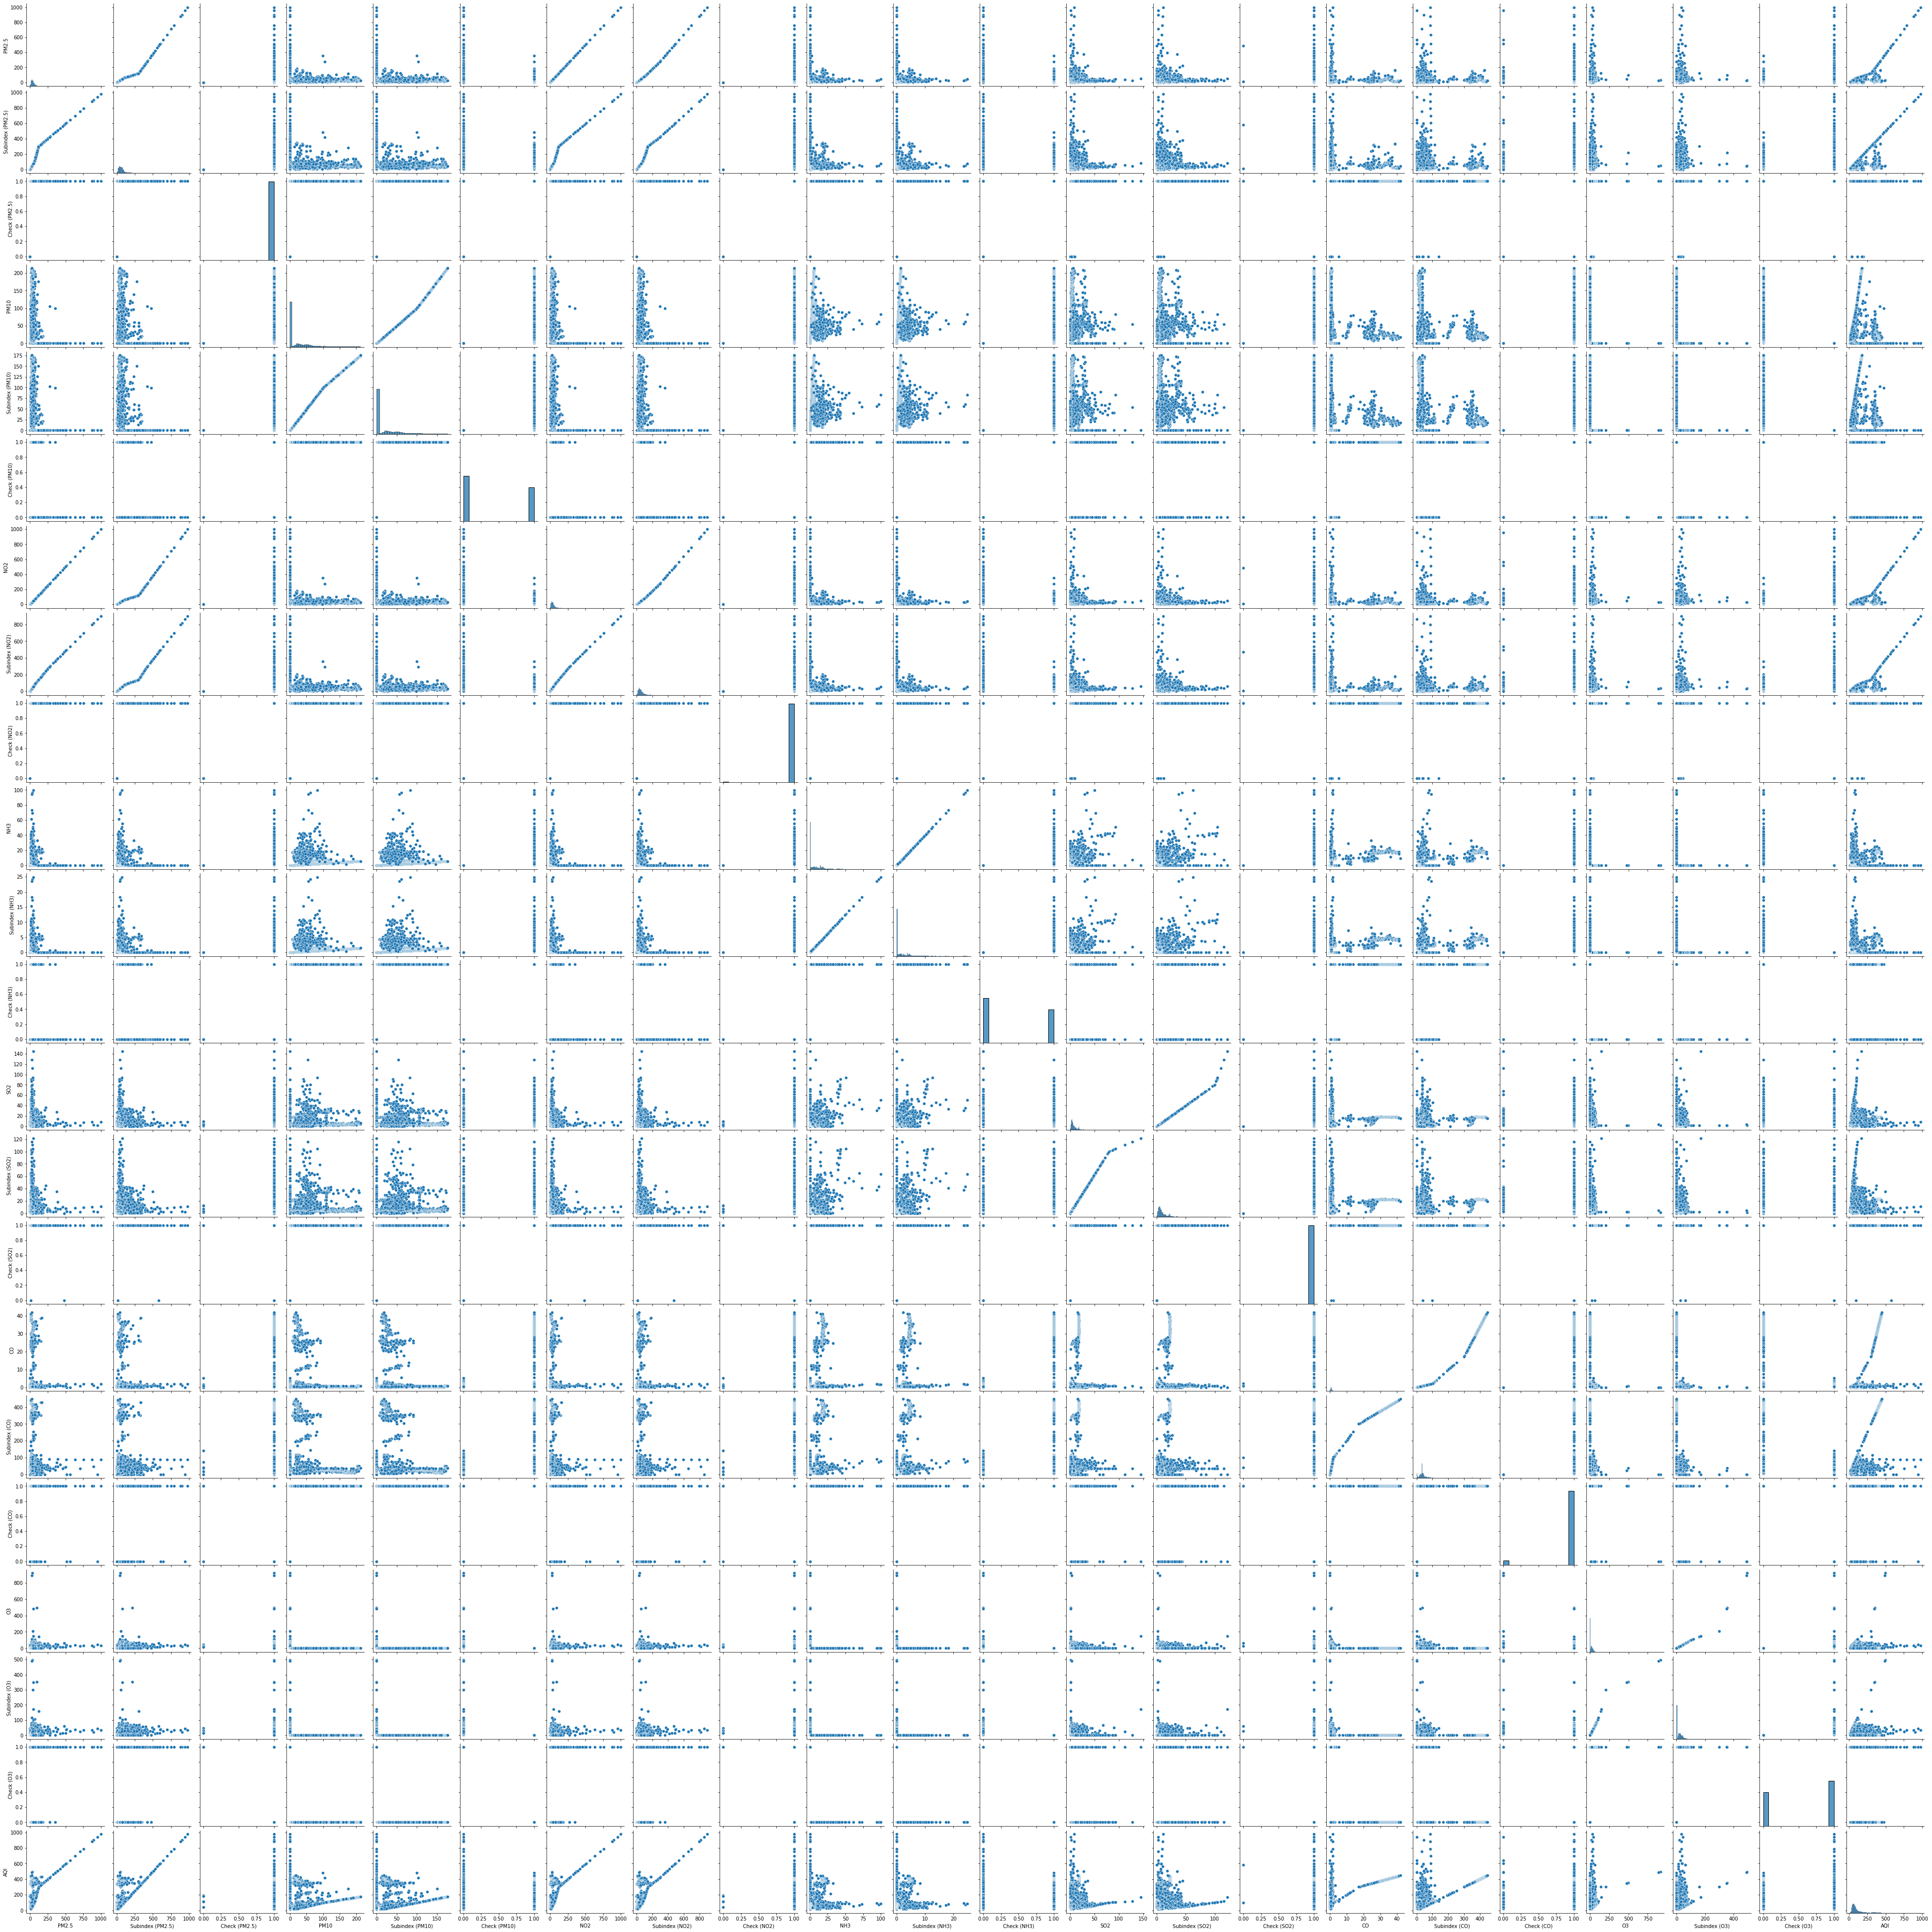

In [376]:
sn.pairplot(df1)